# 1. 예측값(Sales) 월별로 변환후 시각화

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("Sample - Superstore.xls")

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [20]:
data['Order Month'] = ['0' + str(x) if len(str(x)) < 2 else str(x) for x in data['Order Date'].dt.month.astype(str)]
data['Order Month'] = data['Order Date'].dt.year.astype(str) + '-' + data['Order Month']

In [53]:
data2 = data.groupby('Order Month').Sales.mean().reset_index(name = 'mean_sales')

In [54]:
data2['Order Month'] = pd.to_datetime(data2['Order Month'])
data2.set_index('Order Month', inplace = True)
data2.head()

,mean_sales
Order Month,
2014-01-01,180.213861
2014-02-01,98.258522
2014-03-01,354.719803
2014-04-01,209.595148
2014-05-01,193.838418


In [25]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

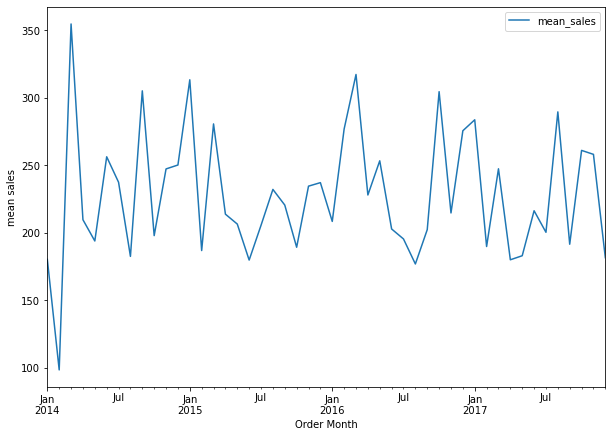

In [65]:
plt.rcParams['figure.figsize'] = (10, 7)
data2.plot()
plt.ylabel('mean sales')
plt.show()

# 2. 데이터 시계열 분해 시각화 후 해석

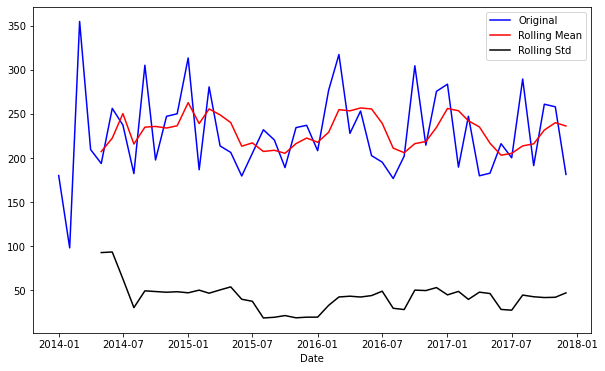

In [70]:
def plot_rolling(data, interval):
    
    rolmean = data.rolling(interval).mean()
    rolstd = data.rolling(interval).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(10, 6))
    plt.xlabel('Date')
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show()
    
plot_rolling(data2['mean_sales'], 5)

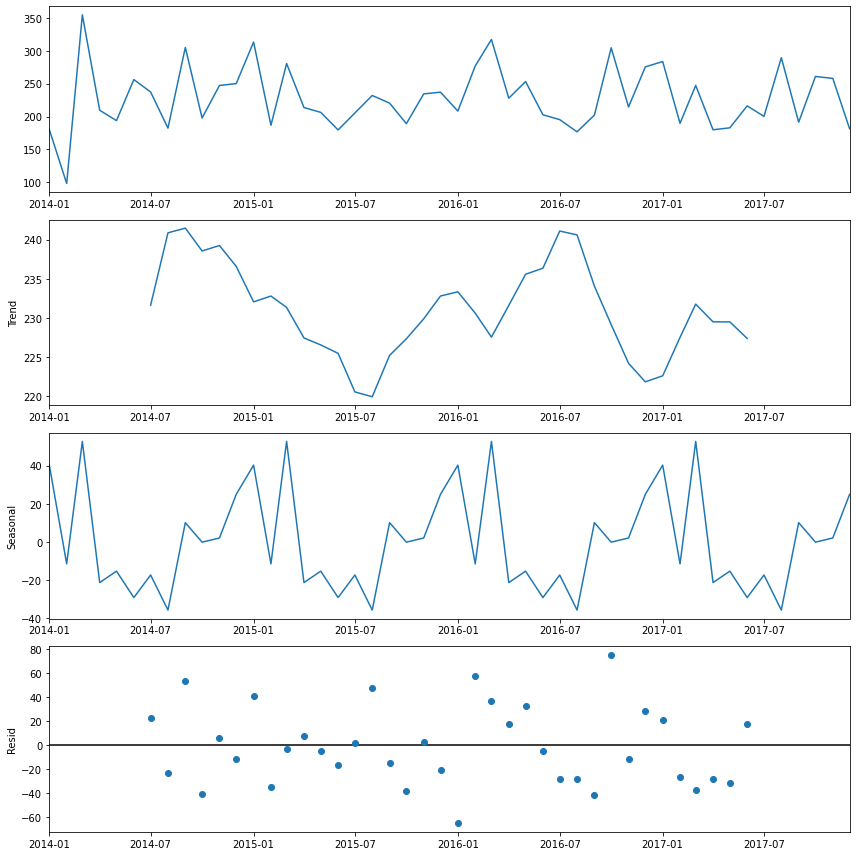

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = [12, 12]

result = seasonal_decompose(data2, model='additive')
result.plot()
plt.show()

잔차가 0을 중심으로 고르게 퍼져있는 것을 알 수 있다. 또한 seasonal 그래프에서 주기가 있는 것을 확인할 수 있고 trend 그래프에서도 주기를 발견할 수 있다.

# 3. 정상성 파악하기

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

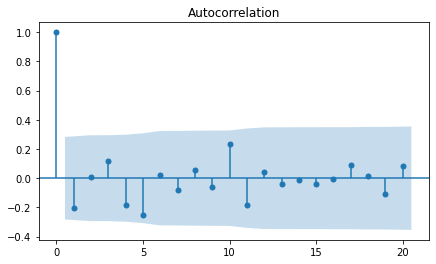

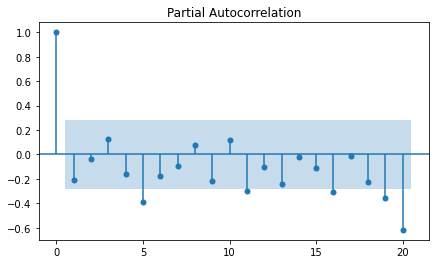

In [73]:
plt.rcParams['figure.figsize'] = (7, 4)
plot_acf(data2['mean_sales'], lags = 20)
plot_pacf(data2['mean_sales'], lags = 20)
plt.show()

In [75]:
from statsmodels.tsa.stattools import adfuller

In [76]:
y = data2['mean_sales']
y1dif = data2['mean_sales'].diff(periods = 1).dropna()

result = adfuller(y)
print("원 데이터의 ADF 값 : {}".format(result[0]))
print('원 데이터의 P-value : {}\n'.format(result[1]))

result1 = adfuller(y1dif, autolag = None)
print("1차 차분 데이터의 ADF 값 : {}".format(result1[0]))
print('1차 차분 데이터의 P-value : {}'.format(result1[1]))

원 데이터의 ADF 값 : -3.2865668298704245
원 데이터의 P-value : 0.01548972019109753

1차 차분 데이터의 ADF 값 : -3.281405159987661
1차 차분 데이터의 P-value : 0.015730402864344118


In [77]:
from statsmodels.tsa.stattools import kpss

In [78]:
statistic, p_value, n_lags, critial_values = kpss(data2['mean_sales'])

print("KPSS Statistic : {}".format(statistic))
print("P-value : {}".format(p_value))
print("num_lags : {}".format(n_lags))
print("Critial_values : {}".format(critial_values))

KPSS Statistic : 0.11023858446407106
P-value : 0.1
num_lags : 10
Critial_values : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


acf, pacf, adf, kpss 검정 결과 모두 차분을 진행하지 않아도 정상성을 만족하는 것으로 나타났다. 

# 4. SARIMA 분석 및 최적 모형 파라미터 선택

In [89]:
import itertools
from tqdm import tqdm
import statsmodels.api as sm

In [92]:
data2.shape

(48, 1)

In [120]:
y_train = data2.iloc[:40]
y_test = data2.iloc[40:]

In [122]:
p, q = range(1,3), range(1,3)
d = range(0,1)
P, Q = range(1,3), range(1,3)
D = range(1,2)
m = 12
trend_pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(candi[0], candi[1], candi[2], m) for candi in list(itertools.product(P, D, Q))]
## SARIMAX
AIC = []
SARIMAX_order = []
for trend_param in tqdm(trend_pdq):
    for seasonal_params in seasonal_pdq:
        try:
            result = sm.tsa.SARIMAX(y_train, trend = 'c', enforce_invertibility = True, enforce_stationarity = True,
                                   order = trend_param, seasonal_order = seasonal_params, exog = None).fit()
            print('Fit SARIMAX: trend_order={} seasonal_order={} AIC={}, BIC={}'.format(trend_param, seasonal_params, result.aic, result.bic, end='\r'))
            AIC.append(result.aic)
            SARIMAX_order.append([trend_param, seasonal_params])
        except:
            continue
## Parameter Selection
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_order[AIC.index(min(AIC))][0], SARIMAX_order[AIC.index(min(AIC))][1]))

  0%|          | 0/4 [00:00<?, ?it/s]/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  w

Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 1, 12) AIC=319.01871480096906, BIC=327.0119418620203


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(1, 1, 2, 12) AIC=321.00505685312476, BIC=330.3304884243512
Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(2, 1, 1, 12) AIC=321.0419880456182, BIC=330.36741961684464


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 25%|██▌       | 1/4 [00:03<00:10,  3.57s/it]/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/

Fit SARIMAX: trend_order=(1, 0, 1) seasonal_order=(2, 1, 2, 12) AIC=323.0121027824609, BIC=333.6697388638625
Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(1, 1, 1, 12) AIC=318.6445822836341, BIC=327.97001385486055


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(1, 1, 2, 12) AIC=320.643706335968, BIC=331.3013424173696


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(2, 1, 1, 12) AIC=320.6964382902021, BIC=331.3540743716037


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 50%|█████     | 2/4 [00:07<00:07,  3.65s/it]

Fit SARIMAX: trend_order=(1, 0, 2) seasonal_order=(2, 1, 2, 12) AIC=322.64455623670153, BIC=334.63439682827834


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-pac

Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(1, 1, 1, 12) AIC=321.0029057911129, BIC=330.3283373623393


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(1, 1, 2, 12) AIC=322.98784923428786, BIC=333.6454853156895


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(2, 1, 1, 12) AIC=323.02135065240935, BIC=333.678986733811


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 75%|███████▌  | 3/4 [00:12<00:04,  4.21s/it]/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting auto

Fit SARIMAX: trend_order=(2, 0, 1) seasonal_order=(2, 1, 2, 12) AIC=324.9850170674377, BIC=336.9748576590145


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(1, 1, 1, 12) AIC=319.12943121467686, BIC=329.7870672960785


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(1, 1, 2, 12) AIC=321.20292443378213, BIC=333.19276502535894


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(2, 1, 1, 12) AIC=321.3614916640537, BIC=333.3513322556305


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
100%|██████████| 4/4 [00:17<00:00,  4.39s/it]

Fit SARIMAX: trend_order=(2, 0, 2) seasonal_order=(2, 1, 2, 12) AIC=323.4603061639419, BIC=336.78235126569393
The smallest AIC is 318.6445822836341 for model SARIMAX(1, 0, 2)x(1, 1, 1, 12)


In [123]:
print(f'ARMA 파라미터는 {SARIMAX_order[AIC.index(min(AIC))][0]}')
print(f'계절성 주기는 {SARIMAX_order[AIC.index(min(AIC))][1]}')

ARMA 파라미터는 (1, 0, 2)
계절성 주기는 (1, 1, 1, 12)


In [124]:
fit_ts_sarimax = sm.tsa.SARIMAX(y_train, trend = 'c', order = SARIMAX_order[AIC.index(min(AIC))][0], 
                                seasonal_order = SARIMAX_order[AIC.index(min(AIC))][1], exog = None,
                               enforce_invertibility = True, enforce_stationarity = True).fit()
display(fit_ts_sarimax.summary())
pred_tr_ts_sarimax = fit_ts_sarimax.predict()
pred_te_ts_sarimax = fit_ts_sarimax.get_forecast(len(y_test), exog = None).predicted_mean
pred_te_ts_sarimax_ci = fit_ts_sarimax.get_forecast(len(y_test), exog = None).conf_int()

/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           mean_sales   No. Observations:                   40
Model:             SARIMAX(1, 0, 2)x(1, 1, [1], 12)   Log Likelihood                -152.322
Date:                              Tue, 01 Jun 2021   AIC                            318.645
Time:                                      11:31:20   BIC                            327.970
Sample:                                  01-01-2014   HQIC                           321.495
                                       - 04-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0467      2.040     -0.023      0.982      -4.046       3.953
ar.L1          0.5669      0.631      0.898      0.369      -0.670       1.804
ma.L1         -0.8190      9.723     -0.084      0.933     -19.876      18.238
ma.L2         -0.1750      1.505     -0.116      0.907      -3.126       2.776
ar.S.L12      -0.1956      1.171     -0.167      0.867      -2.492       2.100
ma.S.L12      -0.3009      1.492     -0.202      0.840      -3.225       2.624
sigma2      2559.9008   2.36e+04      0.108      0.914   -4.38e+04    4.89e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.94   Prob(JB):                         0.41
Heteroskedasticity (H):               0.63   Skew:                             0.50
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [125]:
pred = fit_ts_sarimax.get_forecast(steps = 8).predicted_mean

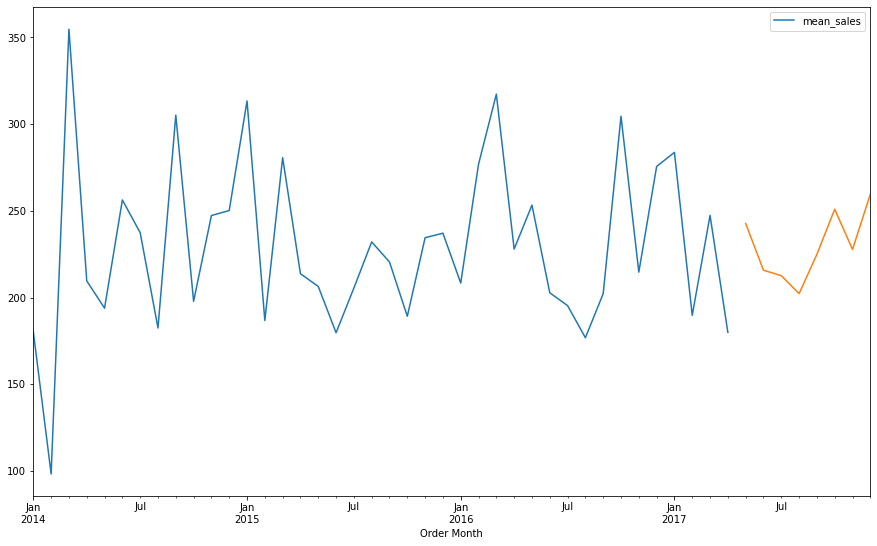

In [126]:
plt.rcParams['figure.figsize'] = (15, 9)
ax = y_train.plot()
pred.plot(ax = ax)
plt.show()

In [127]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [128]:
rmse = np.sqrt(mean_squared_error(y_test, pred))

In [129]:
print(f'SARIMAX 모델의 RMSE는 {rmse}')

SARIMAX 모델의 RMSE는 49.48425773005984


# 5.  사후평가

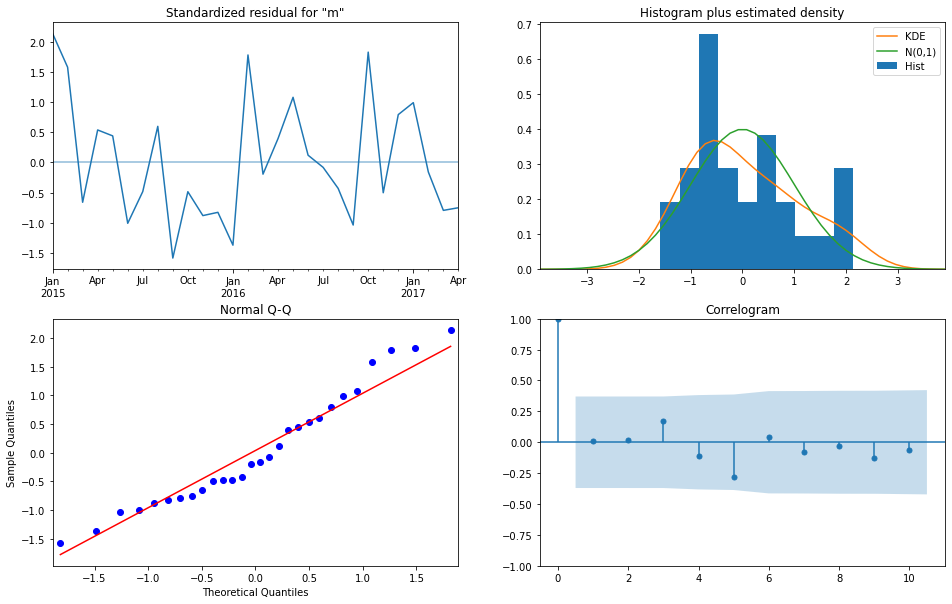

In [130]:
fit_ts_sarimax.plot_diagnostics(figsize = (16,10))
plt.show()

사후 평가 결과 KDE그래프가 정규분포 형태와 매우 유사한 것을 확인하였다. 또한 Q-Q Plot의 경우도 선위에 적합되어 있는 것을 확인하였다. 

In [131]:
from scipy.stats import shapiro, normaltest

In [132]:
shapiro(fit_ts_sarimax.resid)

ShapiroResult(statistic=0.912960946559906, pvalue=0.004657786805182695)

shapiro 검정 결과 유의확률이 0에 근사하므로 '정규성을 만족한다'라는 귀무가설을 기각하지 못한다.

In [133]:
from statsmodels.stats.stattools import durbin_watson

In [134]:
durbin_watson(fit_ts_sarimax.resid)

0.39537553337988157

통계량이 0에 가깝기 때문에 양의 상관관계가 있다고 할 수 있다.
***

# 1. 데이터 전처리(명사 추출 및 불용어 처리 등) - 불용어는 불용어 데이터를 활용

In [84]:
text = pd.read_csv('열혈분식.csv')

In [85]:
text.head()

,label,리뷰점수,리뷰,메뉴
0,1,5.0,너무맛있어요 담에도먹을개요,"참치김밥/1,고구마튀김（2P）/1,제육덮밥/1"
1,1,5.0,고기짬뽕은언제나맛있습니다,"수제고기짬뽕/1,신김치두루치기/1"
2,1,5.0,항상 맛있게 먹어요. 근데 오늘은 김밥 밥이 좀 아쉬웠어요.,"열혈김밥/2,찰보리 쫄볶이/1,제육덮밥/1"
3,1,5.0,너무낫있어요~~~~~~~~,"길어묵（4P）/1,수제치킨까스/1,열혈쫄면/1,캔커피/1"
4,0,2.0,쫄면 별로..특히 제육덮밥은 고기냄새나고ㅜ,"열혈쫄면/1,제육덮밥/1"


In [86]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1391 non-null   int64  
 1   리뷰점수    1391 non-null   float64
 2   리뷰      1391 non-null   object 
 3   메뉴      1376 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 43.6+ KB


In [87]:
from konlpy.tag import Mecab

In [88]:
mecab = Mecab()

In [89]:
import re

In [90]:
text.리뷰 = [re.sub(r'[^가-힣]', ' ', x) for x in text['리뷰']]

In [91]:
text.head()

,label,리뷰점수,리뷰,메뉴
0,1,5.0,너무맛있어요 담에도먹을개요,"참치김밥/1,고구마튀김（2P）/1,제육덮밥/1"
1,1,5.0,고기짬뽕은언제나맛있습니다,"수제고기짬뽕/1,신김치두루치기/1"
2,1,5.0,항상 맛있게 먹어요 근데 오늘은 김밥 밥이 좀 아쉬웠어요,"열혈김밥/2,찰보리 쫄볶이/1,제육덮밥/1"
3,1,5.0,너무낫있어요,"길어묵（4P）/1,수제치킨까스/1,열혈쫄면/1,캔커피/1"
4,0,2.0,쫄면 별로 특히 제육덮밥은 고기냄새나고,"열혈쫄면/1,제육덮밥/1"


In [92]:
stop = pd.read_csv('한국어불용어.csv')

In [93]:
stop.head()

,불용어
0,아
1,휴
2,아이구
3,아이쿠
4,아이고


In [94]:
token_list = []
for t in text['리뷰'] :
    token = mecab.morphs(t)
    review_token = []
    for t2 in token :
        if t2 not in stop.불용어 :
            review_token.append(t2)
        else :
            pass
    token_list.append(review_token)

In [95]:
text['token'] = token_list

In [96]:
text.head()

,label,리뷰점수,리뷰,메뉴,token
0,1,5.0,너무맛있어요 담에도먹을개요,"참치김밥/1,고구마튀김（2P）/1,제육덮밥/1","[너무, 맛있, 어요, 담, 에, 도, 먹, 을, 개요]"
1,1,5.0,고기짬뽕은언제나맛있습니다,"수제고기짬뽕/1,신김치두루치기/1","[고기, 짬뽕, 은, 언제나, 맛있, 습니다]"
2,1,5.0,항상 맛있게 먹어요 근데 오늘은 김밥 밥이 좀 아쉬웠어요,"열혈김밥/2,찰보리 쫄볶이/1,제육덮밥/1","[항상, 맛있, 게, 먹, 어요, 근데, 오늘, 은, 김밥, 밥, 이, 좀, 아쉬웠..."
3,1,5.0,너무낫있어요,"길어묵（4P）/1,수제치킨까스/1,열혈쫄면/1,캔커피/1","[너무, 낫, 있, 어요]"
4,0,2.0,쫄면 별로 특히 제육덮밥은 고기냄새나고,"열혈쫄면/1,제육덮밥/1","[쫄면, 별로, 특히, 제육, 덮밥, 은, 고기, 냄새나, 고]"


# 2. 빈도 수 높은 단어 10개 막대그래프 그리기 및 워드 클라우드



In [97]:
from collections import Counter

In [98]:
sum_token = text.token.sum()

In [99]:
counter = Counter(sum_token)

In [100]:
top10 = dict(counter.most_common(10))

In [101]:
top10_df = pd.DataFrame({'word' : top10.keys(), 'cnt' : top10.values()})
top10_df

,word,cnt
0,맛있,870
1,어요,708
2,먹,662
3,고,595
4,도,557
5,이,546
6,었,459
7,은,370
8,습니다,366
9,게,337


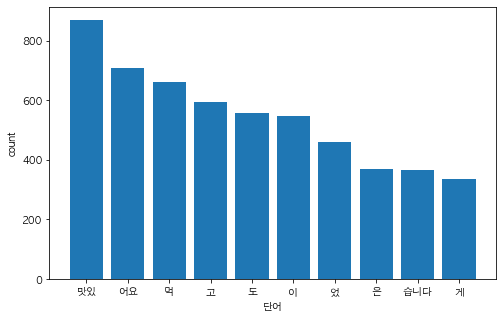

In [102]:
plt.figure(figsize = (8, 5))
plt.bar(top10_df.word, top10_df.cnt)
plt.xlabel('단어')
plt.ylabel('count')
plt.show()

In [103]:
from wordcloud import WordCloud

In [104]:
wc = WordCloud(font_path = 'AppleGothic', background_color = 'white').generate_from_frequencies(top10)

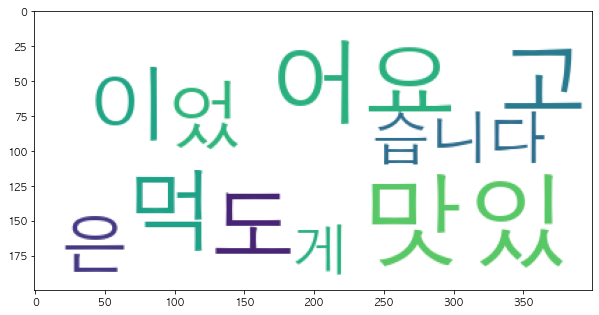

In [105]:
plt.figure(figsize = (10, 6))
plt.imshow(wc)
plt.show()

# 3. 타겟 변수 파악 후 불균형 할 경우 처리 -> 시각화



In [106]:
text.label.value_counts()

1    1301
0      90
Name: label, dtype: int64

In [107]:
from imblearn import over_sampling 

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [109]:
X_train, X_test, y_train, y_test = train_test_split(text.token, text.label, stratify = text.label, shuffle = True, random_state = 601)

In [110]:
tf = TfidfVectorizer(max_features = 500, ngram_range = (1, 2), lowercase = False)

In [111]:
tr_sentence = []
for t in X_train :
    c = ''
    for n in range(len(t)) :
        text = t[n] + ' '
        c += text
    tr_sentence.append(c)

In [112]:
te_sentence = []
for t in X_test :
    c = ''
    for n in range(len(t)) :
        text = t[n] + ' '
        c += text
    te_sentence.append(c)

In [113]:
tr_x = tf.fit_transform(tr_sentence).todense()
te_x = tf.transform(te_sentence).todense()

In [114]:
tr_x = pd.DataFrame(tr_x, columns = tf.get_feature_names())
te_x = pd.DataFrame(te_x, columns = tf.get_feature_names())

In [115]:
smote = over_sampling.SMOTE(random_state = 601)

In [116]:
sm_tr_x, sm_y_train = smote.fit_resample(tr_x, y_train)

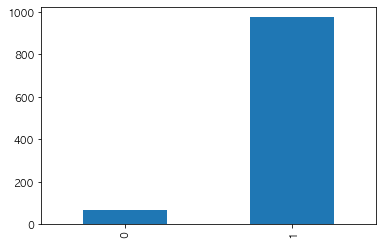

In [117]:
y_train.value_counts().plot(kind = 'bar')
plt.show()

y값이 1대1 비율로 맞춰졌다.

# 4. 이후 감성분석 시행



In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
rf = RandomForestClassifier(random_state = 601)

In [153]:
rf.fit(sm_tr_x, sm_y_train)

RandomForestClassifier(random_state=601)

In [154]:
sm_pred = rf.predict(te_x)

In [155]:
rf = RandomForestClassifier(random_state = 601)

In [156]:
rf.fit(tr_x, y_train)

RandomForestClassifier(random_state=601)

In [157]:
pred = gnb.predict(te_x)

In [133]:
from sklearn.metrics import accuracy_score

# 5. train, test 정확성 시각화

In [160]:
acc = accuracy_score(y_test, pred)

In [161]:
smote_acc = accuracy_score(y_test, sm_pred)

In [165]:
acc_df = pd.DataFrame({'model' : ['랜덤포레스트', 'SMOTE + 랜덤포레스트'], 'acc' : [acc, smote_acc]})
acc_df

,model,acc
0,랜덤포레스트,0.689655
1,SMOTE + 랜덤포레스트,0.931034


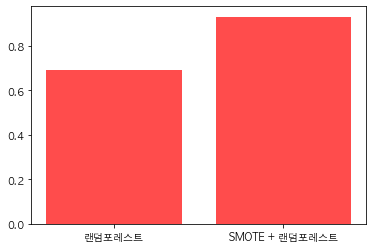

In [171]:
plt.bar(acc_df.model, acc_df.acc, color = 'r', alpha = .7)
plt.show()